<a href="https://colab.research.google.com/github/JARIN-TIAS/DataAnalysis-/blob/main/Doctor_CRM_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Doctor_crm_data.xlsx to Doctor_crm_data.xlsx


In [2]:
!pip install pandas openpyxl


In [5]:
import pandas as pd

# Load the Excel file (replace 'your_file.xlsx' with the actual filename)
df = pd.read_excel('/content/Doctor_crm_data.xlsx')
# Display the first few rows
print(df.head())

# Get summary information
print(df.info())


   SL    Agent Name              Brand       Phone      Query Type  \
0   1  Sumaiya  NaN  Square Toiletries  1950709602  caller hung up   
1   2  Sumaiya  NaN  Square Toiletries  1804357662           prank   
2   3   Samana  NaN  Square Toiletries  1742833648           prank   
3   4  Sumaiya  NaN  Square Toiletries  1784719364  caller hung up   
4   5   Samana  NaN  Square Toiletries  1917431263           prank   

  Caller Patient Verbatim Call Status           Created at  
0        Inbound   silent      Silent  2024-10-24 08:01:24  
1        Inbound    prank       Prank  2024-10-24 08:09:38  
2        Inbound      NaN       Prank  2024-10-24 08:13:34  
3        Inbound   silent      Silent  2024-10-24 09:06:29  
4        Inbound      NaN       Prank  2024-10-24 09:24:26  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SL             

In [9]:
#Data Cleaning Check for missing values
print(df.isnull().sum())

# Fill missing values or drop them
df.dropna(subset=['Agent', 'Call Status'], inplace=True)  # Replace 'ColumnName' with relevant column



SL                 0
Agent              0
Name              39
Brand              0
Phone              0
Query Type         0
Caller Patient     0
Verbatim          38
Call Status        0
Created at         0
dtype: int64


In [10]:
# Descriptive Analysis
# Frequency counts for 'Query Type'
query_counts = df['Query Type'].value_counts()
print(query_counts)

# Pivot table example
pivot_table = df.pivot_table(index='Agent', columns='Call Status', values='SL', aggfunc='count', fill_value=0)
print(pivot_table)


Query Type
unreachable                            22
HANGUP                                 11
caller hung up                         10
prank                                   7
redial drop successful                  7
drop call                               3
drug query                              2
dry cough                               2
child prank                             2
wants to talk about wife's period       2
Caller didnt respond                    2
on hold                                 2
heavy bleeding during period            2
Child caller                            2
vaccination query                       2
drop call/silent                        2
A swollen bump                          1
period query,vaginal itching            1
dry skin/ how to loose weight           1
hydrocele                               1
skin rash                               1
diarrhoea since last night              1
Skin query                              1
psychological drug quer

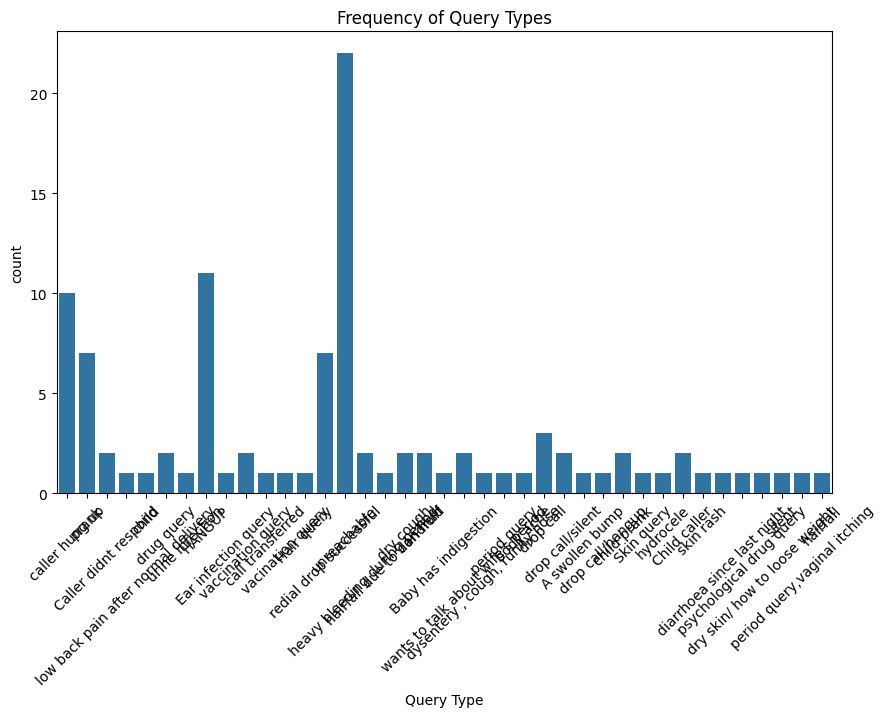

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for Query Type frequencies
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Query Type')
plt.xticks(rotation=45)
plt.title('Frequency of Query Types')
plt.show()
